<a href="https://colab.research.google.com/github/Rakesh-SSN/FYP/blob/master/BERT_TASK_1_MALAYALAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')


import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")



!pip install transformers

Found GPU at: /device:GPU:0
There are 1 GPU(s) available.
We will use the GPU: Tesla P100-PCIE-16GB
     |████████████████████████████████| 501kB 4.8MB/s 
     |████████████████████████████████| 3.7MB 53.1MB/s 
     |████████████████████████████████| 870kB 52.8MB/s 
     |████████████████████████████████| 1.0MB 47.2MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.38-cp36-none-any.whl size=884628 sha256=e105310743133dfd998953896fcf296dd4fc4ea33d758be2055a9876fe394a88
  Stored in directory: /root/.cache/pip/wheels/6d/ec/1a/21b8912e35e02741306f35f66c785f3afe94de754a0eaf1422
Successfully built sacremoses


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import pandas as pd

# Load the dataset into a pandas dataframe.
df = pd.read_csv("/content/drive/My Drive/FYP/bert/glue/cola/malayalam/task1malayalam.tsv", delimiter='\t', header=None, names=['sentence_source', 'label', 'label_notes', 'sentence'])

# Report the number of sentences.
print('Number of training sentences: {:,}\n'.format(df.shape[0]))

# Display 10 random rows from the data.
df.sample(10)

Number of training sentences: 2,500



,sentence_source,label,label_notes,sentence
1722,MAL1723,0,a,സിനിമയില്‍ യുക്തിക്കു ഒരു പ്രാധാന്യവും ഇല്ലെന്...
1424,MAL1425,0,a,ഒറ്റയാന്‍മാരുടെ ജീവിതമാണ് സിദ്ദിഖ് എന്ന സംവിധാ...
645,MAL0646,1,a,റിയോ ഒളിമ്പിക്‌സില്‍ ഇന്ത്യയുടെ ഗുഡ്‌വില്‍ അം...
1792,MAL1793,0,a,അടുത്തയാഴ്ച മുഖ്യമന്ത്രിക്കും മന്ത്രിമാര്‍ക്കു...
2067,MAL2068,0,a,ജർമനിയിലെ നോർത്തേൺ വെസ്റ്റ് ഫാളിയ ശാസ്ത്ര കലാ ...
486,MAL0487,1,a,സ്ഥാനമൊഴിയും മുമ്പ് താജ്മഹൽ കാണാൻ ഒബാമയ്ക്കു മ...
1122,MAL1123,0,a,നോവലിസ്റ്റും കവിയുമായ ജിം ഹാരിസൺ അരിസോണയിലെ വസ...
1770,MAL1771,0,a,ഉത്തര്‍പ്രദേശില്‍ ദേശീയ അന്വേഷണ ഏജന്‍സി ഉദ്യോ...
2346,MAL2347,0,a,സൗദി സര്‍ക്കാരിനെ സമ്മര്‍ദ്ദത്തിലാക്കാനുള്ള ഇറ...
616,MAL0617,1,a,വീട്ടുകാര്‍ ഉംറക്ക് പോയ അവസരം നോക്കി നാല്പ്പത...


In [4]:
df.loc[df.label == 0].sample(5)[['sentence', 'label']]

,sentence,label
1884,പല ഒത്തുതീര്‍പ്പ് ഫോര്‍മുലകളും ഉയര്‍ന്നെങ്കിലു...,0
1647,"പാകിസ്താനിലെ പഞ്ചാബ്, സിന്ധ് പ്രവിശ്യകളില്‍ നി...",0
2452,കാസ്ട്രോ എന്ന അതികായന്‍ ആഗോള ഭീമന്മാരെ വിരട്...,0
2459,മൊബൈല്‍ ഫോണുകളും ലാപ്‌ടോപ്പുകളും പൊട്ടിത്തെറിച...,0
1452,സര്‍വ്വകലാശാല തീരുമാനത്തിനെതിരെ ശക്തമായി പ്രതി...,0


In [0]:
sentences = df.sentence.values
labels = df.label.values

In [6]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', do_lower_case=True)

Loading BERT tokenizer...


In [7]:
# Print the original sentence.
print(' Original: ', sentences[0])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(sentences[0]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0])))

 Original:  റോയൽ ചലഞ്ചേഴ്സിനെ ആറു വിക്കറ്റിന് തകർത്ത് മുംബൈ വീണ്ടും വിജയവഴിയിൽ.<eol>ബാംഗ്ലൂര്‍ റോയൽ ചലഞ്ചേഴ്സിനെ മുംബൈ ആറ് വിക്കറ്റിന് തോല്‍പിച്ചു.
Tokenized:  ['റ', '##േ', '##ായ', '##ൽ', 'ച', '##ല', '##ഞ', '##ച', '##േ', '##ഴ', '##സി', '##നെ', 'ആ', '##റ', 'വി', '##ക', '##ക', '##റ', '##റി', '##ന', 'ത', '##കർ', '##ത', '##ത', 'മ', '##ം', '##ബ', '##ൈ', 'വ', '##ീ', '##ണ', '##ടം', 'വി', '##ജ', '##യ', '##വ', '##ഴി', '##യിൽ', '.', '<', 'eo', '##l', '>', 'ബ', '##ാം', '##ഗ', '##ല', '##ര', 'റ', '##േ', '##ായ', '##ൽ', 'ച', '##ല', '##ഞ', '##ച', '##േ', '##ഴ', '##സി', '##നെ', 'മ', '##ം', '##ബ', '##ൈ', 'ആ', '##റ', 'വി', '##ക', '##ക', '##റ', '##റി', '##ന', 'ത', '##േ', '##ാല', '##പ', '##ി', '##ച', '##ച', '.']
Token IDs:  [1360, 29400, 40542, 15080, 1339, 38847, 111389, 111386, 29400, 111399, 108628, 47639, 1322, 75301, 80054, 17896, 17896, 75301, 37054, 25344, 1348, 94330, 20854, 20854, 1357, 14885, 111397, 59009, 1364, 60434, 36089, 53144, 80054, 111388, 18395, 36877, 90865, 17878, 119, 133, 13934, 1016

In [8]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []

# For every sentence...
for sent in sentences:
    # `encode` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    encoded_sent = tokenizer.encode(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'

                        # This function also supports truncation and conversion
                        # to pytorch tensors, but we need to do padding, so we
                        # can't use these features :( .
                        #max_length = 128,          # Truncate all sentences.
                        #return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.
    input_ids.append(encoded_sent)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

Original:  റോയൽ ചലഞ്ചേഴ്സിനെ ആറു വിക്കറ്റിന് തകർത്ത് മുംബൈ വീണ്ടും വിജയവഴിയിൽ.<eol>ബാംഗ്ലൂര്‍ റോയൽ ചലഞ്ചേഴ്സിനെ മുംബൈ ആറ് വിക്കറ്റിന് തോല്‍പിച്ചു.
Token IDs: [101, 1360, 29400, 40542, 15080, 1339, 38847, 111389, 111386, 29400, 111399, 108628, 47639, 1322, 75301, 80054, 17896, 17896, 75301, 37054, 25344, 1348, 94330, 20854, 20854, 1357, 14885, 111397, 59009, 1364, 60434, 36089, 53144, 80054, 111388, 18395, 36877, 90865, 17878, 119, 133, 13934, 10161, 135, 1355, 25406, 111383, 38847, 23290, 1360, 29400, 40542, 15080, 1339, 38847, 111389, 111386, 29400, 111399, 108628, 47639, 1357, 14885, 111397, 59009, 1322, 75301, 80054, 17896, 17896, 75301, 37054, 25344, 1348, 29400, 79591, 111395, 15035, 111386, 111386, 119, 102]


In [9]:
print('Max sentence length: ', max([len(sen) for sen in input_ids]))

Max sentence length:  277


In [10]:
# We'll borrow the `pad_sequences` utility function to do this.
from keras.preprocessing.sequence import pad_sequences

# Set the maximum sequence length.
# I've chosen 64 somewhat arbitrarily. It's slightly larger than the
# maximum training sentence length of 47...
MAX_LEN = 64

print('\nPadding/truncating all sentences to %d values...' % MAX_LEN)

print('\nPadding token: "{:}", ID: {:}'.format(tokenizer.pad_token, tokenizer.pad_token_id))

# Pad our input tokens with value 0.
# "post" indicates that we want to pad and truncate at the end of the sequence,
# as opposed to the beginning.
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", 
                          value=0, truncating="post", padding="post")

print('\nDone.')


Padding/truncating all sentences to 64 values...

Padding token: "[PAD]", ID: 0

Done.


Using TensorFlow backend.


In [0]:
# Create attention masks
attention_masks = []

# For each sentence...
for sent in input_ids:
    
    # Create the attention mask.
    #   - If a token ID is 0, then it's padding, set the mask to 0.
    #   - If a token ID is > 0, then it's a real token, set the mask to 1.
    att_mask = [int(token_id > 0) for token_id in sent]
    
    # Store the attention mask for this sentence.
    attention_masks.append(att_mask)

In [12]:
# Use train_test_split to split our data into train and validation sets for
# training
from sklearn.model_selection import train_test_split

# Use 90% for training and 10% for validation.
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels, 
                                                            random_state=2018, test_size=0.2)
print(train_inputs)
print(train_labels)

# Do the same for the masks.
train_masks, validation_masks, _, _ = train_test_split(attention_masks, labels,
                                             random_state=2018, test_size=0.2)
#print(train_masks)

[[   101   1357 111399 ...  23290  27215  21403]
 [   101   1357  25344 ...  75301  17896  71430]
 [   101   1325  20854 ...  20854  20854  23290]
 ...
 [   101  80054  36877 ... 111393  18395  47357]
 [   101   1321 111395 ...  60955  47025  93330]
 [   101   1321  36877 ...  42870  30585   1353]]
[1 0 1 ... 1 0 0]


In [0]:
# Convert all inputs and labels into torch tensors, the required datatype 
# for our model.


train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)

train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)

train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

In [0]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here.
# For fine-tuning BERT on a specific task, the authors recommend a batch size of
# 16 or 32.

batch_size = 32

# Create the DataLoader for our training set.
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set.
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)


In [15]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    "bert-base-multilingual-cased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 2, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elemen

In [16]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (119547, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              

In [0]:
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )


In [0]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs (authors recommend between 2 and 4)
epochs = 4

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [0]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [0]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))


In [21]:
import random

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128


# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Store the average loss after each epoch so we can plot them.
loss_values = []

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # This will return the loss (rather than the model output) because we
        # have provided the `labels`.
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        outputs = model(b_input_ids, 
                    token_type_ids=None, 
                    attention_mask=b_input_mask, 
                    labels=b_labels)
        
        # The call to `model` always returns a tuple, so we need to pull the 
        # loss value out of the tuple.
        loss = outputs[0]

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)            
    
    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)
        
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        
        # Telling the model not to compute or store gradients, saving memory and
        # speeding up validation
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # This will return the logits rather than the loss because we have
            # not provided labels.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            outputs = model(b_input_ids, 
                            token_type_ids=None, 
                            attention_mask=b_input_mask)
        
        # Get the "logits" output by the model. The "logits" are the output
        # values prior to applying an activation function like the softmax.
        logits = outputs[0]

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        
        # Calculate the accuracy for this batch of test sentences.
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        
        # Accumulate the total accuracy.
        eval_accuracy += tmp_eval_accuracy

        # Track the number of batches
        nb_eval_steps += 1

    # Report the final accuracy for this validation run.
    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))

print("")
print("Training complete!")


======== Epoch 1 / 4 ========
Training...
  Batch    40  of     63.    Elapsed: 0:00:09.

  Average training loss: 0.62
  Training epcoh took: 0:00:14

Running Validation...
  Accuracy: 0.73
  Validation took: 0:00:01

======== Epoch 2 / 4 ========
Training...
  Batch    40  of     63.    Elapsed: 0:00:09.

  Average training loss: 0.52
  Training epcoh took: 0:00:14

Running Validation...
  Accuracy: 0.74
  Validation took: 0:00:01

======== Epoch 3 / 4 ========
Training...
  Batch    40  of     63.    Elapsed: 0:00:09.

  Average training loss: 0.42
  Training epcoh took: 0:00:14

Running Validation...
  Accuracy: 0.78
  Validation took: 0:00:01

======== Epoch 4 / 4 ========
Training...
  Batch    40  of     63.    Elapsed: 0:00:09.

  Average training loss: 0.35
  Training epcoh took: 0:00:14

Running Validation...
  Accuracy: 0.78
  Validation took: 0:00:01

Training complete!


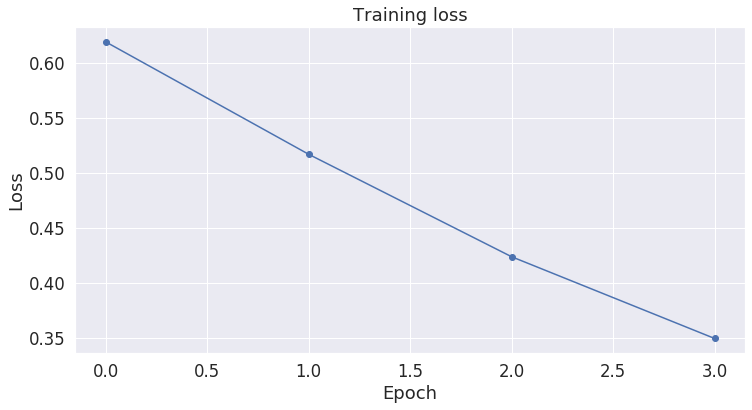

In [22]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(loss_values, 'b-o')

# Label the plot.
plt.title("Training loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

In [23]:
import pandas as pd

# Load the dataset into a pandas dataframe.
df = pd.read_csv("/content/drive/My Drive/FYP/bert/glue/cola/testdata/task1malayalam-test.tsv", delimiter='\t', header=None, names=['sentence_source', 'label', 'label_notes', 'sentence'])

# Report the number of sentences.
print('Number of test sentences: {:,}\n'.format(df.shape[0]))

# Create sentence and label lists
sentences = df.sentence.values
labels = df.label.values

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []

# For every sentence...
for sent in sentences:
    # `encode` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    encoded_sent = tokenizer.encode(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                   )
    
    input_ids.append(encoded_sent)

# Pad our input tokens
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, 
                          dtype="long", truncating="post", padding="post")

# Create attention masks
attention_masks = []

# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask) 

# Convert to tensors.
prediction_inputs = torch.tensor(input_ids)
prediction_masks = torch.tensor(attention_masks)
prediction_labels = torch.tensor(labels)

# Set the batch size.  
batch_size = 32  

# Create the DataLoader.
prediction_data = TensorDataset(prediction_inputs, prediction_masks, prediction_labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

Number of test sentences: 900



In [24]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(prediction_inputs)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)

  logits = outputs[0]
  
  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)
  # # print(predictions)
  #print(true_labels)
print('    DONE.')

#print(true_labels)
print("*************************")

#print(len(predictions))
#print(outputs)


    


Predicting labels for 900 test sentences...
    DONE.
*************************


In [0]:
import numpy as np
np.savetxt("/content/drive/My Drive/FYP/bert/glue/cola/task1malayalam-results.txt",predictions, fmt="%s")



In [26]:

count_NP=0
count_P=0
count_line=1
x=-1
true_count,false_count=0,0
print("label \t sno\tlogit\t\t\t\t\tindex")
for i in range(len(predictions)):
  for j in range(len(predictions[i])):
    print("(",end="")
    print(true_labels[i][j],end="")
    print(")",end="")
    print("\t",count_line,end="")
    # print("-  ",end="")
    if(predictions[i][j][0]>predictions[i][j][1] ):
      #count_P+=1 
      #print(" Non Paraphrase         ",end="")
      print("\t",predictions[i][j],"\t0\t",end="")
      x=0
    elif(predictions[i][j][1]>predictions[i][j][0] ):
      #print(" Paraphrase     ",end="")
     # count_NP+=1      
      print("\t",predictions[i][j],"\t1\t",end="")
      x=1
    # elif(predictions[i][j][2]>predictions[i][j][0] and predictions[i][j][2]>predictions[i][j][1]):
    #   #print(" Semi Paraphrase     ",end="")
    #   #count_NP+=1      
    #   print("\t",predictions[i][j][2],"\t2\t",end="")
    #   x=1
    count_line+=1
    #print("\t",predictions[i][j],"\t2\t",end="")

    if(true_labels[i][j]==x):
      true_count+=1
      print("true")
    else:
      print("false")
      false_count+=1

print("Number of true predictions:",true_count)
print("Number of false predictions:",false_count)

label 	 sno	logit					index
(1)	 1	 [0.16321082 0.24623224] 	1	true
(1)	 2	 [ 1.493887  -1.2624252] 	0	false
(1)	 3	 [-0.89619684  1.1375929 ] 	1	true
(0)	 4	 [-0.56694406  0.72688025] 	1	false
(0)	 5	 [ 1.6242793 -1.3457456] 	0	true
(0)	 6	 [-0.60103685  0.5904726 ] 	1	false
(1)	 7	 [-0.24860007  0.5863644 ] 	1	true
(0)	 8	 [ 1.4973912 -1.3049142] 	0	true
(0)	 9	 [ 1.5932965 -1.3237065] 	0	true
(1)	 10	 [-1.665229   1.6251606] 	1	true
(0)	 11	 [0.07114942 0.24919803] 	1	false
(1)	 12	 [ 1.4799099 -1.2228427] 	0	false
(0)	 13	 [0.05678448 0.07627615] 	1	false
(0)	 14	 [ 1.5225875 -1.334876 ] 	0	true
(0)	 15	 [ 1.5135739 -1.2722533] 	0	true
(1)	 16	 [ 1.3900368 -0.9873585] 	0	false
(0)	 17	 [-0.47355312  0.65885913] 	1	false
(0)	 18	 [ 1.3953091 -1.2481467] 	0	true
(1)	 19	 [-0.25348592  0.45665157] 	1	true
(0)	 20	 [ 1.507575  -1.4275995] 	0	true
(0)	 21	 [ 1.6461138 -1.3552827] 	0	true
(0)	 22	 [ 1.6584682 -1.4386401] 	0	true
(0)	 23	 [ 0.33495545 -0.13675186] 	0	true
(0)	 24	 [ 1.642

In [27]:
print("Accuracy:",true_count/count_line*100,"%")

Accuracy: 66.0377358490566 %


In [29]:
from sklearn.metrics import matthews_corrcoef

matthews_set = []

# Evaluate each test batch using Matthew's correlation coefficient
print('Calculating Matthews Corr. Coef. for each batch...')

# For each input batch...
for i in range(len(true_labels)):
  
  # The predictions for this batch are a 2-column ndarray (one column for "0" 
  # and one column for "1"). Pick the label with the highest value and turn this
  # in to a list of 0s and 1s.
  pred_labels_i = np.argmax(predictions[i], axis=1).flatten()
  
  

  # Calculate and store the coef for this batch.  
  matthews = matthews_corrcoef(true_labels[i], pred_labels_i)                
  matthews_set.append(matthews)
  
 # print(pred_labels_i)



Calculating Matthews Corr. Coef. for each batch...


In [30]:
matthews_set
# Combine the predictions for each batch into a single list of 0s and 1s.
flat_predictions = [item for sublist in predictions for item in sublist]
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

# Combine the correct labels for each batch into a single list.
flat_true_labels = [item for sublist in true_labels for item in sublist]

# Calculate the MCC
mcc = matthews_corrcoef(flat_true_labels, flat_predictions)

print('MCC: %.3f' % mcc)

MCC: 0.305


In [31]:
print(flat_predictions)
print("************")
print(flat_true_labels)

[1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0
 0 1 1 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 1 1 0 0 1 0
 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0
 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0 1
 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0
 1 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 1 1 0 1
 0 0 0 0 0 0 1 0 1 1 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0
 0 1 1 1 0 1 0 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0
 1 0 1 1 0 1 0 0 0 0 0 1 

In [32]:
import os

# Saving best-practices: if you use defaults names for the model, you can reload it using from_pretrained()

output_dir = '/content/drive/My Drive/FYP/bert/model-colab-task1malayalam'

# Create output directory if needed
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Saving model to %s" % output_dir)

# Save a trained model, configuration and tokenizer using `save_pretrained()`.
# They can then be reloaded using `from_pretrained()`
model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

# Good practice: save your training arguments together with the trained model
# torch.save(args, os.path.join(output_dir, 'training_args.bin'))


Saving model to /content/drive/My Drive/FYP/bert/model-colab-task1malayalam


('/content/drive/My Drive/FYP/bert/model-colab-task1malayalam/vocab.txt',
 '/content/drive/My Drive/FYP/bert/model-colab-task1malayalam/special_tokens_map.json',
 '/content/drive/My Drive/FYP/bert/model-colab-task1malayalam/added_tokens.json')